# 🧠 Understanding Classification Performance Metrics

## Why Accuracy Isn’t Always the Full Story?

Accuracy is the simplest way to check if a model is doing well.  
It’s just the percentage of predictions that are correct.

Example:  
If your model gets **95 out of 100 predictions right**, you’d say it’s 95% accurate.

Sounds great, right?  
But here’s the trap: if your dataset is **imbalanced** (one class is much more common than the other), accuracy can fool you.

💡 Example:  
If only 1% of transactions are fraudulent, a model that predicts *“not fraud”* for everything will be **99% accurate** — but will **never** catch fraud.

That’s why we need other metrics that tell us *how* the model is making its predictions.


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train model
model = LogisticRegression(max_iter=2500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Accuracy: 0.95


## Confusion Matrix: Seeing Exactly Where We’re Right and Wrong

A **confusion matrix** is like a scoreboard for our model.  
It counts:
- **True Positives (TP)** – correctly predicted *positive* cases
- **True Negatives (TN)** – correctly predicted *negative* cases
- **False Positives (FP)** – predicted positive, but actually negative
- **False Negatives (FN)** – predicted negative, but actually positive

It’s called “confusion” because it shows where the model is mixing things up.


In [2]:
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(
    cm,
    index=['Actual: Benign (0)', 'Actual: Malignant (1)'],
    columns=['Predicted: Benign (0)', 'Predicted: Malignant (1)']
)


,Predicted: Benign (0),Predicted: Malignant (1)
Actual: Benign (0),57,7
Actual: Malignant (1),2,105


## Precision: "When I Predict Positive, How Often Am I Right?"

**What it means:**  
Of all the times the model said *“positive”*, how many were actually positive?  

**High precision** = fewer false positives.

✅ Use when:
- **False positives are costly**  
- Example: If you’re testing a drug for safety, you want to be *very sure* before declaring it unsafe, because calling a safe drug unsafe (false positive) could waste millions.

❌ Not the best when:
- Missing positives (false negatives) is worse than a few false alarms.


## Recall: "How Many of the Actual Positives Did I Catch?"

**What it means:**  
Of all the actual positive cases, how many did the model find?  

**High recall** = fewer false negatives.

✅ Use when:
- **False negatives are costly**  
- Example: In cancer screening, you’d rather flag too many people (even with some false alarms) than miss someone who is sick.

❌ Not the best when:
- You can’t afford too many false positives.


## F1 Score: "A Balance Between Precision and Recall"

**What it means:**  
The F1 score is a single number that balances precision and recall.  

✅ Use when:
- You need **both** false positives and false negatives to be reasonably low.
- Your classes are imbalanced and you need a single comparison number.

❌ Not great when:
- You only care about one side (precision *or* recall) — it hides that detail.


---
## 6. ROC-AUC — "How Well Can My Model Separate the Classes?"

**What it means:**  
ROC-AUC looks at how well the model can tell the difference between positives and negatives *across all possible thresholds*.

✅ Use when:
- You want to compare models **without committing to a single threshold**.
- You want a general measure of model separability.

❌ Not enough by itself when:
- Business costs for false positives/negatives are very different —  
  you still need precision or recall for those decisions.


In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Precision: 0.94
Recall: 0.98
F1 Score: 0.96
ROC-AUC: 0.99


## Choosing the Right Metric

| Metric     | Best When... | Focuses On |
|------------|--------------|------------|
| **Accuracy**   | Classes are balanced & all mistakes cost the same | Overall correctness |
| **Precision**  | False positives are expensive | Avoiding false alarms |
| **Recall**     | False negatives are expensive | Catching as many positives as possible |
| **F1 Score**   | Need a balance between precision & recall | Overall balance |
| **ROC-AUC**    | Want a threshold-free comparison | General separability |


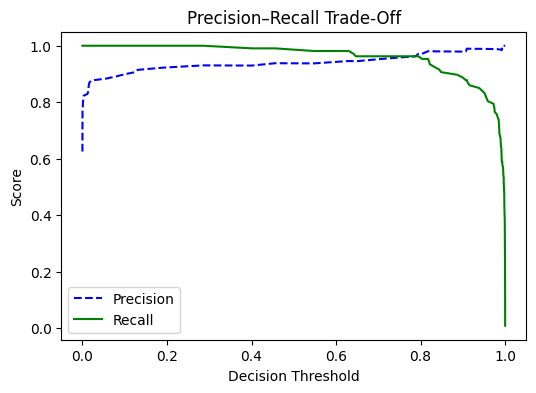

In [4]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(6,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision–Recall Trade-Off")
plt.show()


## Key Takeaways

- Accuracy can hide poor performance, especially in imbalanced datasets.
- **Precision** → important when false positives are costly.  
- **Recall** → important when false negatives are costly.  
- **F1 Score** → good for balancing both.  
- **ROC-AUC** → great for comparing models without fixing a threshold.
- Always choose your metric based on the *real-world cost* of mistakes.


## Tuning the Decision Threshold to Meet Business Needs

Most classifiers (like Logistic Regression) give us a **probability score** for each prediction —  
we then choose a **threshold** (default is 0.5) to decide if it’s positive or negative.

By moving this threshold up or down, we can **control precision and recall**:

- Lower threshold → More positives predicted → **Higher recall**, lower precision  
- Higher threshold → Fewer positives predicted → **Higher precision**, lower recall  

💡 Real-world example:  
- If our goal is to **catch at least 95% of actual positives** (high recall), we might lower the threshold.  
- If our goal is to **minimize false alarms** (high precision), we might raise the threshold.


In [5]:
# Business goal: Recall >= 0.95
target_recall = 0.95

# Get precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Find the smallest threshold where recall meets or exceeds target
threshold_index = np.argmax(recalls >= target_recall)
best_threshold = thresholds[threshold_index]

print(f"Chosen threshold for recall >= {target_recall}: {best_threshold:.2f}")
print(f"Precision at this threshold: {precisions[threshold_index]:.2f}")
print(f"Recall at this threshold: {recalls[threshold_index]:.2f}")


Chosen threshold for recall >= 0.95: 0.00
Precision at this threshold: 0.63
Recall at this threshold: 1.00


## Visualizing the Threshold Choice

Here’s what our **Precision–Recall curve** looks like,  
with the chosen threshold marked on it.


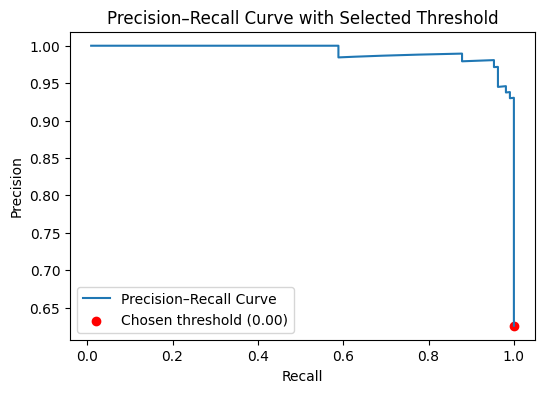

In [6]:
plt.figure(figsize=(6,4))
plt.plot(recalls[:-1], precisions[:-1], label="Precision–Recall Curve")
plt.scatter(
    recalls[threshold_index], 
    precisions[threshold_index], 
    color="red", 
    label=f"Chosen threshold ({best_threshold:.2f})"
)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve with Selected Threshold")
plt.legend()
plt.show()


## Why This Matters

By adjusting the threshold:
- We **don’t have to retrain the model** — just change the decision point.
- We can **adapt the model to business priorities**:
    - Hospitals → prioritize recall to catch all patients who might be sick.
    - Email spam filters → prioritize precision to avoid putting important emails in spam.

This is where machine learning stops being “just code” and starts becoming a **business tool**.
